In [1]:
import os
from glob import glob
import pandas as pd 
from functools import reduce
from xml.etree import ElementTree as et 

import warnings
warnings.filterwarnings ("ignore")

In [2]:
# load the xml files and store it in a list
import glob
xml_files = glob.glob(r"C:\Users\Dell\Desktop\My work\Finall projects\yolo project\main/*.xml")
xml_files

['C:\\Users\\Dell\\Desktop\\My work\\Finall projects\\yolo project\\main\\2007_000027_jpg.rf.f198388eb768f32a89be553841611d3a.xml',
 'C:\\Users\\Dell\\Desktop\\My work\\Finall projects\\yolo project\\main\\2007_000032_jpg.rf.453cf71521fb73718369a7f07a41433c.xml',
 'C:\\Users\\Dell\\Desktop\\My work\\Finall projects\\yolo project\\main\\2007_000033_jpg.rf.83ab0d65cbcc0be92b649082c8a21ffb.xml',
 'C:\\Users\\Dell\\Desktop\\My work\\Finall projects\\yolo project\\main\\2007_000039_jpg.rf.eb878cf899cc46bcc3a2d91c6dfede0d.xml',
 'C:\\Users\\Dell\\Desktop\\My work\\Finall projects\\yolo project\\main\\2007_000042_jpg.rf.21843925939a653bd7530db380564108.xml',
 'C:\\Users\\Dell\\Desktop\\My work\\Finall projects\\yolo project\\main\\2007_000061_jpg.rf.46ef80849da87d8113c0330be6ea5beb.xml',
 'C:\\Users\\Dell\\Desktop\\My work\\Finall projects\\yolo project\\main\\2007_000063_jpg.rf.16bcc21d9560419290a752f8d6439caf.xml',
 'C:\\Users\\Dell\\Desktop\\My work\\Finall projects\\yolo project\\main\\20

In [3]:
# Check if xmlfiles is indeed a list
if isinstance(xml_files, list):
    # Define the replace_text function
    def replace_text(path):
        return path.replace("\\", "/")
    
    # Replace backslashes with forward slashes in paths
    xml_files = list(map(replace_text, xml_files))
    
    # Print each full path for the XML files
    for file in xml_files:
        print(file)
else:
    print("xml_files is not a list.")

C:/Users/Dell/Desktop/My work/Finall projects/yolo project/main/2007_000027_jpg.rf.f198388eb768f32a89be553841611d3a.xml
C:/Users/Dell/Desktop/My work/Finall projects/yolo project/main/2007_000032_jpg.rf.453cf71521fb73718369a7f07a41433c.xml
C:/Users/Dell/Desktop/My work/Finall projects/yolo project/main/2007_000033_jpg.rf.83ab0d65cbcc0be92b649082c8a21ffb.xml
C:/Users/Dell/Desktop/My work/Finall projects/yolo project/main/2007_000039_jpg.rf.eb878cf899cc46bcc3a2d91c6dfede0d.xml
C:/Users/Dell/Desktop/My work/Finall projects/yolo project/main/2007_000042_jpg.rf.21843925939a653bd7530db380564108.xml
C:/Users/Dell/Desktop/My work/Finall projects/yolo project/main/2007_000061_jpg.rf.46ef80849da87d8113c0330be6ea5beb.xml
C:/Users/Dell/Desktop/My work/Finall projects/yolo project/main/2007_000063_jpg.rf.16bcc21d9560419290a752f8d6439caf.xml
C:/Users/Dell/Desktop/My work/Finall projects/yolo project/main/2007_000068_jpg.rf.59f7be9df94d9d96fbe68b8d25df36f2.xml
C:/Users/Dell/Desktop/My work/Finall pro

In [4]:
# demo for 1 xml file

tree=et.parse('C:\\Users\\Dell\\Desktop\\My work\\Finall projects\\yolo project\\main\\2007_000027_jpg.rf.f198388eb768f32a89be553841611d3a.xml')
root = tree.getroot()
print(root)

<Element 'annotation' at 0x0000026312841030>


In [5]:
def extract_text(filename):
    
    tree = et.parse(filename)
    root = tree.getroot()

    #extract  the filename
    image_name=root.find("filename").text

    # width and height of the image
    width=root.find("size").find("width").text

    height = root.find("size").find("height").text
    
    objs = root.findall ("object")

    parser=[]

    for ob in objs:
        name = ob.find("name").text
        bndbox = ob.find("bndbox")
        xmin=bndbox.find("xmin").text
        xmax=bndbox.find("xmax").text
        ymin = bndbox.find('ymin').text
        ymax = bndbox.find('ymax').text
        parser .append([image_name , width , height , name , xmin , xmax , ymin , ymax]) 
    
    return parser


In [6]:
parser_all = list(map(extract_text,xml_files))
print(parser_all)

[[], [['2007_000032_jpg.rf.453cf71521fb73718369a7f07a41433c.jpg', '500', '281', 'aeroplane', '104', '375', '78', '183'], ['2007_000032_jpg.rf.453cf71521fb73718369a7f07a41433c.jpg', '500', '281', 'aeroplane', '133', '197', '88', '123'], ['2007_000032_jpg.rf.453cf71521fb73718369a7f07a41433c.jpg', '500', '281', 'person', '195', '213', '180', '229'], ['2007_000032_jpg.rf.453cf71521fb73718369a7f07a41433c.jpg', '500', '281', 'person', '26', '44', '189', '238']], [['2007_000033_jpg.rf.83ab0d65cbcc0be92b649082c8a21ffb.jpg', '500', '366', 'aeroplane', '9', '499', '107', '263'], ['2007_000033_jpg.rf.83ab0d65cbcc0be92b649082c8a21ffb.jpg', '500', '366', 'aeroplane', '421', '482', '200', '226'], ['2007_000033_jpg.rf.83ab0d65cbcc0be92b649082c8a21ffb.jpg', '500', '366', 'aeroplane', '325', '411', '188', '223']], [['2007_000039_jpg.rf.eb878cf899cc46bcc3a2d91c6dfede0d.jpg', '500', '375', 'tvmonitor', '156', '344', '89', '279']], [['2007_000042_jpg.rf.21843925939a653bd7530db380564108.jpg', '500', '335',

In [7]:
parser_all

[[],
 [['2007_000032_jpg.rf.453cf71521fb73718369a7f07a41433c.jpg',
   '500',
   '281',
   'aeroplane',
   '104',
   '375',
   '78',
   '183'],
  ['2007_000032_jpg.rf.453cf71521fb73718369a7f07a41433c.jpg',
   '500',
   '281',
   'aeroplane',
   '133',
   '197',
   '88',
   '123'],
  ['2007_000032_jpg.rf.453cf71521fb73718369a7f07a41433c.jpg',
   '500',
   '281',
   'person',
   '195',
   '213',
   '180',
   '229'],
  ['2007_000032_jpg.rf.453cf71521fb73718369a7f07a41433c.jpg',
   '500',
   '281',
   'person',
   '26',
   '44',
   '189',
   '238']],
 [['2007_000033_jpg.rf.83ab0d65cbcc0be92b649082c8a21ffb.jpg',
   '500',
   '366',
   'aeroplane',
   '9',
   '499',
   '107',
   '263'],
  ['2007_000033_jpg.rf.83ab0d65cbcc0be92b649082c8a21ffb.jpg',
   '500',
   '366',
   'aeroplane',
   '421',
   '482',
   '200',
   '226'],
  ['2007_000033_jpg.rf.83ab0d65cbcc0be92b649082c8a21ffb.jpg',
   '500',
   '366',
   'aeroplane',
   '325',
   '411',
   '188',
   '223']],
 [['2007_000039_jpg.rf.eb878cf89

In [8]:
data = reduce(lambda x,y : x+y,parser_all)
data

[['2007_000032_jpg.rf.453cf71521fb73718369a7f07a41433c.jpg',
  '500',
  '281',
  'aeroplane',
  '104',
  '375',
  '78',
  '183'],
 ['2007_000032_jpg.rf.453cf71521fb73718369a7f07a41433c.jpg',
  '500',
  '281',
  'aeroplane',
  '133',
  '197',
  '88',
  '123'],
 ['2007_000032_jpg.rf.453cf71521fb73718369a7f07a41433c.jpg',
  '500',
  '281',
  'person',
  '195',
  '213',
  '180',
  '229'],
 ['2007_000032_jpg.rf.453cf71521fb73718369a7f07a41433c.jpg',
  '500',
  '281',
  'person',
  '26',
  '44',
  '189',
  '238'],
 ['2007_000033_jpg.rf.83ab0d65cbcc0be92b649082c8a21ffb.jpg',
  '500',
  '366',
  'aeroplane',
  '9',
  '499',
  '107',
  '263'],
 ['2007_000033_jpg.rf.83ab0d65cbcc0be92b649082c8a21ffb.jpg',
  '500',
  '366',
  'aeroplane',
  '421',
  '482',
  '200',
  '226'],
 ['2007_000033_jpg.rf.83ab0d65cbcc0be92b649082c8a21ffb.jpg',
  '500',
  '366',
  'aeroplane',
  '325',
  '411',
  '188',
  '223'],
 ['2007_000039_jpg.rf.eb878cf899cc46bcc3a2d91c6dfede0d.jpg',
  '500',
  '375',
  'tvmonitor',
 

In [9]:
# Create DataFrame with specified columns
df = pd.DataFrame(data, columns=["filename", "width", "height", "name", "xmin", "xmax", "ymin", "ymax"])

# Display the first few rows
df.head()

filename width height       name  \
0  2007_000032_jpg.rf.453cf71521fb73718369a7f07a4...   500    281  aeroplane   
1  2007_000032_jpg.rf.453cf71521fb73718369a7f07a4...   500    281  aeroplane   
2  2007_000032_jpg.rf.453cf71521fb73718369a7f07a4...   500    281     person   
3  2007_000032_jpg.rf.453cf71521fb73718369a7f07a4...   500    281     person   
4  2007_000033_jpg.rf.83ab0d65cbcc0be92b649082c8a...   500    366  aeroplane   

  xmin xmax ymin ymax  
0  104  375   78  183  
1  133  197   88  123  
2  195  213  180  229  
3   26   44  189  238  
4    9  499  107  263

In [10]:
df.name.value_counts()

name
person         16457
chair           3055
car             2491
dog             1598
bottle          1561
cat             1277
bird            1271
pottedplant     1202
sheep           1084
boat            1059
aeroplane       1002
tvmonitor        893
sofa             841
bicycle          837
horse            803
diningtable      800
motorbike        800
cow              771
train            704
bus              685
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39191 entries, 0 to 39190
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  39191 non-null  object
 1   width     39191 non-null  object
 2   height    39191 non-null  object
 3   name      39191 non-null  object
 4   xmin      39191 non-null  object
 5   xmax      39191 non-null  object
 6   ymin      39191 non-null  object
 7   ymax      39191 non-null  object
dtypes: object(8)
memory usage: 2.4+ MB


In [12]:
cols = ["width" , "height" , "xmin" , "xmax" , "ymin" , "ymax"]
df[cols] = df[cols].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39191 entries, 0 to 39190
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  39191 non-null  object
 1   width     39191 non-null  int32 
 2   height    39191 non-null  int32 
 3   name      39191 non-null  object
 4   xmin      39191 non-null  int32 
 5   xmax      39191 non-null  int32 
 6   ymin      39191 non-null  int32 
 7   ymax      39191 non-null  int32 
dtypes: int32(6), object(2)
memory usage: 1.5+ MB


In [13]:
# Center x, center y
df["center_x"] = ((df["xmax"] + df["xmin"]) / 2) / df["width"]
df["center_y"] = ((df["ymax"] + df["ymin"]) / 2) / df["height"]

# Width
df["w"] = (df["xmax"] - df["xmin"]) / df["width"]

# Height
df["h"] = (df["ymax"] - df["ymin"]) / df["height"]


In [14]:
df.head()

filename  width  height  \
0  2007_000032_jpg.rf.453cf71521fb73718369a7f07a4...    500     281   
1  2007_000032_jpg.rf.453cf71521fb73718369a7f07a4...    500     281   
2  2007_000032_jpg.rf.453cf71521fb73718369a7f07a4...    500     281   
3  2007_000032_jpg.rf.453cf71521fb73718369a7f07a4...    500     281   
4  2007_000033_jpg.rf.83ab0d65cbcc0be92b649082c8a...    500     366   

        name  xmin  xmax  ymin  ymax  center_x  center_y      w         h  
0  aeroplane   104   375    78   183     0.479  0.464413  0.542  0.373665  
1  aeroplane   133   197    88   123     0.330  0.375445  0.128  0.124555  
2     person   195   213   180   229     0.408  0.727758  0.036  0.174377  
3     person    26    44   189   238     0.070  0.759786  0.036  0.174377  
4  aeroplane     9   499   107   263     0.508  0.505464  0.980  0.426230

In [15]:
images = df["filename"].unique()
len(images)

16601

In [16]:
# 80% to train and 20% to test
img_df = pd.DataFrame(images,columns=["filename"])

# 80% of images are chosen randomly
img_train = tuple(img_df.sample(frac=0.8)["filename"])

In [17]:
img_train

('2010_001595_jpg.rf.3e4880cb9cd565662d9da3d277ed512d.jpg',
 '2011_003755_jpg.rf.ee4e3c62e49d00b552689b4c4eb2e4b1.jpg',
 '2008_007947_jpg.rf.ab9191cf4b5efc45b1625232f2395bac.jpg',
 '2009_002759_jpg.rf.58caf431566fff80df8c16f03875fd58.jpg',
 '2012_001657_jpg.rf.f97fcfa851e0c279d6eb094090ede34d.jpg',
 '2008_001290_jpg.rf.a00ea4c64fa9e40373bffa2ad6379877.jpg',
 '2009_004316_jpg.rf.15edfc0d29e5e31968c13890d49126f1.jpg',
 '2007_004627_jpg.rf.f51c8e1c64f1bfe47d24051644a750dc.jpg',
 '2009_001514_jpg.rf.68f9fcdbb91f979a92bec333ed5cf2de.jpg',
 '2008_008613_jpg.rf.cf26469818550750c262bfb26ac8ddc9.jpg',
 '2010_001418_jpg.rf.7f0e03304012a1b95fc6c8c08db82b36.jpg',
 '2011_006006_jpg.rf.2b8fe2470df6837c01ab815b40df4a48.jpg',
 '2007_000804_jpg.rf.9d801775cac74dd2fec1f8e6e229a651.jpg',
 '2010_003770_jpg.rf.c8cbf0ad5726784e00eb70a97618b54d.jpg',
 '2009_003122_jpg.rf.3260b9606bfc573d7a11b9d74101f8f7.jpg',
 '2011_005884_jpg.rf.e0b5443592e5be7164e6be2087cc4e85.jpg',
 '2008_001462_jpg.rf.e682afea7eb2012af42

In [18]:
img_test  = tuple(img_df.query(f"filename not in {img_train}")["filename"])
# it will take rest 20% images ignoring the images included in the training set

print(img_test)

('2007_000039_jpg.rf.eb878cf899cc46bcc3a2d91c6dfede0d.jpg', '2007_000175_jpg.rf.89dd3b1705cf32b3b67f325b8b782a36.jpg', '2007_000333_jpg.rf.10dc496466e7bc62531098819bcb5650.jpg', '2007_000515_jpg.rf.d3db68425d96e88b8f8811585b0715f6.jpg', '2007_000629_jpg.rf.037efa1d7de46a4a5ced395d1d8034c1.jpg', '2007_000648_jpg.rf.0e74d108c5398bdc5b8911a62eedd95f.jpg', '2007_000661_jpg.rf.e8a4e72280d5e9e0352e5836bfe18c9b.jpg', '2007_000663_jpg.rf.757aaf4c133e428f63c397ff4206da2e.jpg', '2007_000738_jpg.rf.6ebec7f1e8938d1f74fdf4235e8c36ed.jpg', '2007_000783_jpg.rf.ea02a0b3fa5ac09fc10cc119dfef487a.jpg', '2007_000830_jpg.rf.bc4cab67386d15cdcf0e3b150869531d.jpg', '2007_000836_jpg.rf.811e4fb300ca896e7119e498a4352388.jpg', '2007_000925_jpg.rf.3b807b6b255894a9d9f0cae00add4736.jpg', '2007_001377_jpg.rf.9cbff29a4e4f64cdcdeb9b4f01d31a22.jpg', '2007_001458_jpg.rf.ed8f2d658c9a128e5ddb3798557dba99.jpg', '2007_001594_jpg.rf.68dc0932403ee85fb5a22b50b7efd4be.jpg', '2007_001595_jpg.rf.e4d99e29c58cd54989624d81208ec4eb.jp

In [19]:
print(f"length of training set is {len(img_train)}")
print(f"length of test set is {len(img_test)}")

length of training set is 13281
length of test set is 3320


In [20]:
train_df = df.query(f"filename in {img_train}")
test_df = df.query(f"filename in {img_test}")

In [21]:
df.name.unique()

array(['aeroplane', 'person', 'tvmonitor', 'train', 'boat', 'dog',
       'chair', 'bird', 'bicycle', 'bottle', 'sheep', 'diningtable',
       'horse', 'motorbike', 'sofa', 'cow', 'car', 'cat', 'bus',
       'pottedplant'], dtype=object)

In [27]:
# List of names
names = ['person' , 'chair' , 'car' , 'dog' , 'bottle' , 'Cat' , 'Dog' , 'pottedplant' , 'sheep' , 'boat' , 
         'aeroplane' , 'tvmonitor' , 'bird' , 'sofa' , 'bicycle' , 'horse' , 'diningtable' , 'motorbike' , 'cow' , 'train' , 'bus']
    

# Create a label encoding dictionary
label_mapping = {name: idx for idx, name in enumerate(names)}

def label_encoding(x):
    # Return the label if found, else return -1
    return label_mapping.get(x, -1)


In [28]:
label_mapping

{'person': 0,
 'chair': 1,
 'car': 2,
 'dog': 3,
 'bottle': 4,
 'Cat': 5,
 'Dog': 6,
 'pottedplant': 7,
 'sheep': 8,
 'boat': 9,
 'aeroplane': 10,
 'tvmonitor': 11,
 'bird': 12,
 'sofa': 13,
 'bicycle': 14,
 'horse': 15,
 'diningtable': 16,
 'motorbike': 17,
 'cow': 18,
 'train': 19,
 'bus': 20}

In [29]:
train_df["id"] = train_df["name"].apply(label_encoding)
test_df["id"] = test_df["name"].apply(label_encoding)

In [30]:
train_df.head(20)


filename  width  height  \
0   2007_000032_jpg.rf.453cf71521fb73718369a7f07a4...    500     281   
1   2007_000032_jpg.rf.453cf71521fb73718369a7f07a4...    500     281   
2   2007_000032_jpg.rf.453cf71521fb73718369a7f07a4...    500     281   
3   2007_000032_jpg.rf.453cf71521fb73718369a7f07a4...    500     281   
4   2007_000033_jpg.rf.83ab0d65cbcc0be92b649082c8a...    500     366   
5   2007_000033_jpg.rf.83ab0d65cbcc0be92b649082c8a...    500     366   
6   2007_000033_jpg.rf.83ab0d65cbcc0be92b649082c8a...    500     366   
8   2007_000042_jpg.rf.21843925939a653bd7530db3805...    500     335   
9   2007_000042_jpg.rf.21843925939a653bd7530db3805...    500     335   
10  2007_000061_jpg.rf.46ef80849da87d8113c0330be6e...    500     333   
11  2007_000061_jpg.rf.46ef80849da87d8113c0330be6e...    500     333   
12  2007_000063_jpg.rf.16bcc21d9560419290a752f8d64...    500     375   
13  2007_000063_jpg.rf.16bcc21d9560419290a752f8d64...    500     375   
14  2007_000068_jpg.rf.59f7be9df94d9d96fbe68b8d25d...    500     375   
15  2007_000121_jpg.rf.807519c5d839ae8e10504ffb0c1...    500     375   
16  2007_000121_jpg.rf.807519c5d839ae8e10504ffb0c1...    500     375   
17  2007_000123_jpg.rf.2aecf15e0c3118c74b379e7273e...    500     375   
18  2007_000129_jpg.rf.c0e72bec842a59b2efca1de567d...    334     500   
19  2007_000129_jpg.rf.c0e72bec842a59b2efca1de567d...    334     500   
20  2007_000129_jpg.rf.c0e72bec842a59b2efca1de567d...    334     500   

         name  xmin  xmax  ymin  ymax  center_x  center_y         w         h  \
0   aeroplane   104   375    78   183  0.479000  0.464413  0.542000  0.373665   
1   aeroplane   133   197    88   123  0.330000  0.375445  0.128000  0.124555   
2      person   195   213   180   229  0.408000  0.727758  0.036000  0.174377   
3      person    26    44   189   238  0.070000  0.759786  0.036000  0.174377   
4   aeroplane     9   499   107   263  0.508000  0.505464  0.980000  0.426230   
5   aeroplane   421   482   200   226  0.903000  0.581967  0.122000  0.071038   
6   aeroplane   325   411   188   223  0.736000  0.561475  0.172000  0.095628   
8       train   263   500    32   295  0.763000  0.488060  0.474000  0.785075   
9       train     1   235    36   299  0.236000  0.500000  0.468000  0.785075   
10       boat   274   437    11   279  0.711000  0.435435  0.326000  0.804805   
11       boat   184   281   214   252  0.465000  0.699700  0.194000  0.114114   
12        dog   123   379   115   275  0.502000  0.520000  0.512000  0.426667   
13      chair    75   428     1   375  0.503000  0.501333  0.706000  0.997333   
14       bird    27   266    45   375  0.293000  0.560000  0.478000  0.880000   
15  tvmonitor   251   475    28   267  0.726000  0.393333  0.448000  0.637333   
16  tvmonitor    22   251    28   273  0.273000  0.401333  0.458000  0.653333   
17      train     1   358    26   340  0.359000  0.488000  0.714000  0.837333   
18    bicycle    70   255   202   500  0.486527  0.702000  0.553892  0.596000   
19    bicycle   251   334   242   500  0.875749  0.742000  0.248503  0.516000   
20    bicycle     1    67   144   436  0.101796  0.580000  0.197605  0.584000   

    id  
0   10  
1   10  
2    0  
3    0  
4   10  
5   10  
6   10  
8   19  
9   19  
10   9  
11   9  
12   3  
13   1  
14  12  
15  11  
16  11  
17  19  
18  14  
19  14  
20  14

In [31]:
import os
from shutil import move

In [32]:
import os

train_folder = r"C:\Users\Dell\Desktop\My work\Finall projects\yolo project\main\train"
validation_folder = r"C:\Users\Dell\Desktop\My work\Finall projects\yolo project\main\val"

os.makedirs(train_folder, exist_ok=True)
os.makedirs(validation_folder, exist_ok=True)


In [33]:
cols = ['filename','id','center_x','center_y', 'w', 'h']
groupby_obj_train = train_df[cols].groupby("filename")
groupby_obj_test = test_df[cols].groupby("filename")

In [34]:
import os
from shutil import move

def save_data(filename, folder_path, group_obj):
    src = os.path.join(r"C:\Users\Dell\Desktop\My work\Finall projects\yolo project\main", filename)  # Ensure base folder path is correct
    dest = os.path.join(folder_path, filename)
        # Move the image to the destination folder
    move(src, dest)
     # save the model information 
    text_filename = os.path.join(folder_path ,
                                  os.path.splitext(filename)[0]+'.txt')
    group_obj.get_group(filename).set_index("filename").to_csv(text_filename , sep = " ",index= False,header=False)


In [35]:
x=groupby_obj_train.get_group('0001.jpg').set_index("filename").to_csv("sample.txt",index=False,header=False)
print(x)

KeyError: '0001.jpg'

In [36]:
filename_series = pd.Series(groupby_obj_train.groups.keys())
filename_series

0        2007_000032_jpg.rf.453cf71521fb73718369a7f07a4...
1        2007_000033_jpg.rf.83ab0d65cbcc0be92b649082c8a...
2        2007_000042_jpg.rf.21843925939a653bd7530db3805...
3        2007_000061_jpg.rf.46ef80849da87d8113c0330be6e...
4        2007_000063_jpg.rf.16bcc21d9560419290a752f8d64...
                               ...                        
13276    2012_004319_jpg.rf.041b79ed131e12472350582650a...
13277    2012_004326_jpg.rf.79ea97dee935f7fa3ff0cbbc697...
13278    2012_004328_jpg.rf.425a4f466af106fd53a07c9c9d7...
13279    2012_004329_jpg.rf.5cb2429f5df7b447862311b06aa...
13280    2012_004330_jpg.rf.1d0e98842132ce2b40bace5d80f...
Length: 13281, dtype: object

In [37]:
filename_series.apply(save_data, args=(train_folder, groupby_obj_train))


0        None
1        None
2        None
3        None
4        None
         ... 
13276    None
13277    None
13278    None
13279    None
13280    None
Length: 13281, dtype: object

In [38]:
filename_series_test = pd.Series(groupby_obj_test.groups.keys())
filename_series_test.apply(save_data,args=(validation_folder,groupby_obj_test))


0       None
1       None
2       None
3       None
4       None
        ... 
3315    None
3316    None
3317    None
3318    None
3319    None
Length: 3320, dtype: object

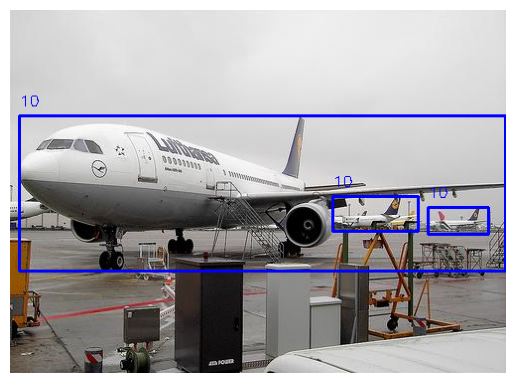

In [40]:
import cv2
import matplotlib.pyplot as plt

def draw_bounding_boxes(image_path, annotation_path):
    # Load image
    image = cv2.imread(image_path)
    h, w = image.shape[:2]

    # Read annotations
    with open(annotation_path, 'r') as file:
        annotations = file.readlines()

    # Parse and draw each annotation
    for line in annotations:
        parts = line.strip().split()
        if len(parts) != 5:
            continue
        
        class_id, x_center, y_center, width, height = map(float, parts)
        
        # Convert YOLO format (normalized) to pixel coordinates
        x_min = int((x_center - width / 2) * w)
        y_min = int((y_center - height / 2) * h)
        x_max = int((x_center + width / 2) * w)
        y_max = int((y_center + height / 2) * h)

        # Draw bounding box
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
        cv2.putText(image, str(int(class_id)), (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # Display the image with bounding boxes
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Example usage
draw_bounding_boxes(r'C:\Users\Dell\Desktop\My work\Finall projects\yolo project\main\train\2007_000033_jpg.rf.83ab0d65cbcc0be92b649082c8a21ffb.jpg',r"C:\Users\Dell\Desktop\My work\Finall projects\yolo project\main\train\2007_000033_jpg.rf.83ab0d65cbcc0be92b649082c8a21ffb.txt")
